# Housing Data in King County, WA

**Data Scientist:**  Anhduy(Andy) Nguyen, Juliet Day, Xibei(Julian) He

**Date:** May 13, 2022

## Business Understanding

A real estate developer has expressed interest in developing real estate in the King County, WA area. They have come to us as a team of trained data scientists to recommend an optimized real estate development strategy on the kind of houses they should build and in what areas. This analysis will use different statistical analysis tools including, but not limited to, multiple linear regression, shuffle split validation, cross-validation and OneHotEncoder to find what attributes of a house contribute the most to the house’s value, therefore yielding the highest revenue for the developers.

#### Business Problem
1. What are the effects of zip code on the overall pricing of a house?
2. How much does the size of the house affect the pricing of a house?
3. Do the materials built have an overall effect on the pricing of a house?

## Data Understanding

The main data set used was, King County Housing Data, collected from 2014 to 2015. This data includes the unique identifier for the property, date of sale price, sale price, number of bedrooms, number of bathrooms, square footage of living space in the home, square footage of the lot, number of levels in the house, if it is a waterfront property, quality of the view from the house, the overall condition of the house, the grade of the house, the square footage of the house apart from the basement, square footage of the basement, year it was built, year it was renovated if it was renovated, zip code, the coordinates of the house in latitude and longitude, the square footage of interior house living space for the nearest 15 neighbors, and the square footage lot space of the nearest 15 neighbors. The data set was then cleaned before analysis was run on it.

The second data set, Zipcodes for King County and Surrounding Area, includes location data for King County. This data set was used for mapping purposes.

### Importing Modules/Libraries

In [1]:
# Importing possible needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error
from patsy import dmatrices


import folium
from folium import plugins
from folium.plugins import HeatMap

#### Useful Viewing Code

In [2]:
# Got this off Xiaohua Su code super useful
# Shows *all* columns in dataframe, i.e. does not truncate horizontally

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Importing Data Set

In [3]:
# Importing data set using King's County data set through Pandas

df = pd.read_csv("data/kc_house_data.csv")

### 1.A Exploring Data

In [4]:
# Running df head to see data set

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
# Running df describe to see statistical info

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


There seems to be some major outliers in multiple columns that may be need to remove, including the **33 bedrooms** and the **1651359 square foot lot**.

In [6]:
# Running df info to see column names, datatypes and possible nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Checking for null values
# Keeping and not removing null values because the other data is still useful and the columns that contain the null values
# won't be used in analysis

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# Looking for duplicated data ID would be the only column where looking for duplicated data makes sense

print(df.duplicated().sum())
df['id'].duplicated().sum()

0


177

In [9]:
# Checking to see what IDs are duplicated

df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [10]:
# Looking at the differences in the columns of duplicated IDs
# Most recent sale date shows an increase

df.loc[(df['id'] == 795000620 ) | 
      (df['id'] == 1825069031)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.00,4,1.75,2410,8447,2.00,NO,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
3947,1825069031,10/16/2014,550000.00,4,1.75,2410,8447,2.00,NaN,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
17588,795000620,9/24/2014,115000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17589,795000620,12/15/2014,124000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17590,795000620,3/11/2015,157000.00,3,1.00,1080,6250,1.00,NaN,NONE,Fair,5 Fair,1080,0.0,1950,nan,98168,47.50,-122.33,1070,6250


The duplicated ideas seem to come from the same house being sold multiple times.  The plan is to get rid of the duplicated id's and keep the most recent one.

In [11]:
# Checking the condition names

df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [12]:
# Checking grade names

df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

These are valuable attributes that are expected to change the sales price of a house.  We view these columns more as scalar data then categorical data and will change them into integers.

### 1.B Data Cleaning

In [13]:
# Making a copy of the original data set so the original data set keeps its integrity

df_copy = df.copy()

In [14]:
# Running df copy to make sure it works

df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,Average,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,Average,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,Average,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,Average,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [15]:
# Dropping duplicate id's while keeping the most recent date

df_copy = df_copy.drop_duplicates(subset= ['id'], keep = "last")

In [16]:
# Sanity check

df_copy['id'].duplicated().sum()

0

In [17]:
# Changing grade to only be a numerical for better analysis against price

df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')

<ipython-input-17-553f432eaf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')


In [18]:
# Sanity Check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [19]:
# Possible removing the one grade 3, the thirteen  grade 13, and the twenty seven grade 4

df_copy["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [20]:
# Looking at the data of the three least common gradings, very high outliers will remove

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,6/4/2014,299000.00,1,0.75,560,12120,1.00,NaN,NONE,Average,4,560,0.0,1967,0.00,98014,47.67,-121.85,1300,19207
465,8658300340,5/23/2014,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500
1065,3340401535,11/5/2014,140000.00,1,1.00,730,6890,1.00,NO,NONE,Good,4,730,0.0,1926,0.00,98055,47.47,-122.22,1790,7969
3220,2420069251,2/25/2015,262000.00,1,0.75,520,12981,1.00,NO,NONE,Very Good,3,520,0.0,1920,0.00,98022,47.21,-122.00,1340,12233
3578,1925069006,12/3/2014,355000.00,1,0.75,530,33278,1.00,NO,AVERAGE,Good,4,530,0.0,1950,0.00,98074,47.64,-122.08,2830,14311
3881,5279100625,4/29/2015,248000.00,2,1.00,770,8600,1.00,NO,NONE,Good,4,770,0.0,1914,nan,98027,47.53,-122.03,1420,6960
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
4807,9831200500,3/4/2015,2480000.00,5,3.75,6810,7500,2.50,NO,NONE,Average,13,6110,700.0,1922,0.00,98102,47.63,-122.32,2660,7500
5199,4048400185,10/22/2014,352000.00,2,0.75,760,33801,1.00,NO,NONE,Good,4,760,0.0,1931,0.00,98059,47.47,-122.08,1100,39504
5446,7237501190,10/10/2014,1780000.00,4,3.25,4890,13402,2.00,NO,NONE,Average,13,4890,0.0,2004,0.00,98059,47.53,-122.13,5790,13539


In [21]:
# Removing grade 13, 4, and 3 houses from dataset because of the small number of occurences and the price will skew data

df_copy = df_copy.loc[(df_copy['grade'] != 13) & (df_copy['grade'] != 3) & (df_copy["grade"] != 4)]

In [22]:
# Sanity check on removal of houses

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [23]:
# sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  object 
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [24]:
# Changing the values of condition to numericals for easier data analysis where poor = 1, fair =2, etc.

df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Poor", '1'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Fair", '2'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Average", '3'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Very Good", '5'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Good", '4'))

In [25]:
# Sanity check

df_copy['condition'].value_counts()

3    13877
4     5631
5     1686
2      158
1       27
Name: condition, dtype: int64

In [26]:
# Changing the string into an int

df_copy['condition'] = df_copy["condition"].astype("int64")

In [27]:
# Sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  int64  
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [28]:
# Dropping the columns that won't be used in our analysis

df_clean = df_copy.drop(["id","date","waterfront", "view", 
             "sqft_basement", "yr_renovated"], axis = 1)

* removing **id** because a house identifier should be irrelevant to the housing prices, removing **date** because it should be irrelevant to housing prices unless there a surges in the housing market in particular years that won't be shown in the scope of the data, removing **waterfront, view, sqft_basement, and yr_renovated** due to them having nulls or them being categorical data where we don't have the time to individually test for them

In [29]:
# Sanity check

df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


### 1.C Exploring Clean Data

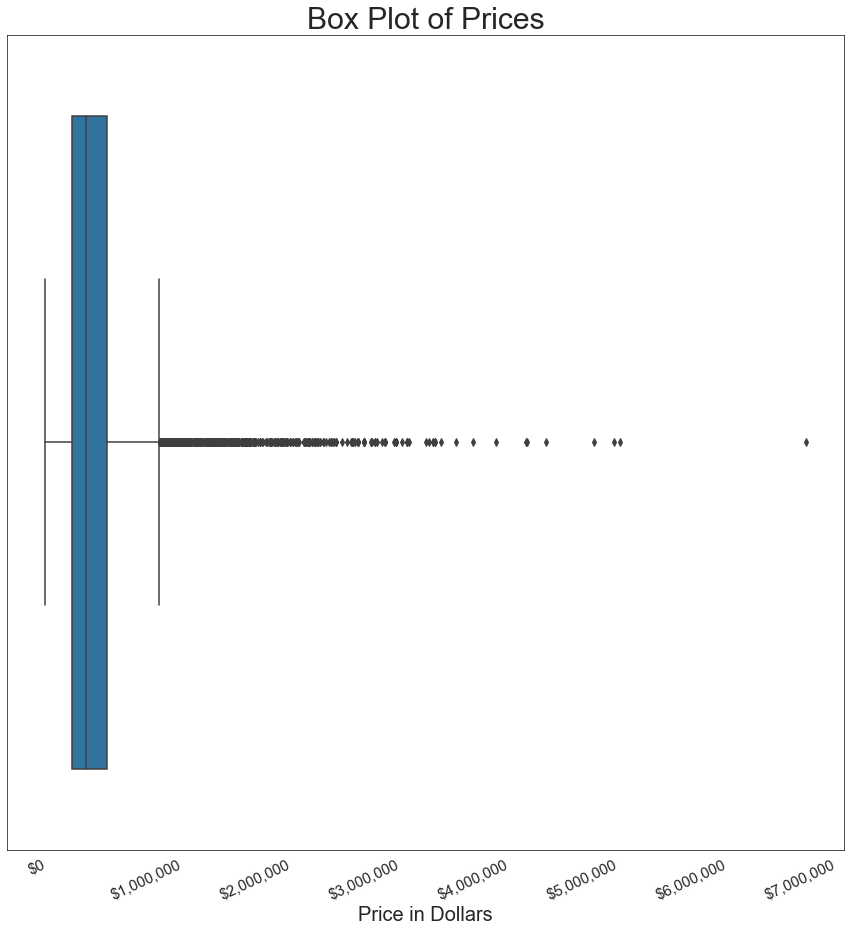

In [30]:
# boxplot of price
# thinking about getting rid of the outlier
sns.set_style("white")

fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x= df_clean["price"])

ax.set_title("Box Plot of Prices", fontsize = 30)
ax.set_xlabel("Price in Dollars", fontsize = 20)

plt.ticklabel_format(style = 'plain', axis = 'x')

plt.xticks(rotation = 25, fontsize = 15)

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '${:,.0f}'.format(x))))

plt.show()

In [31]:
# Got this from Xiaohua Su, Luke Dowker, Jawwad Siddiqui
# Finding cut-off point: `price` IQR with mean price

q3, q1 = np.percentile(df_clean['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_clean['price'].mean()- (iqr*1.5)

upper_limit = df_clean['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(60289.17704289255, 1020439.1770428926)

In [32]:
# Limit the range of the pricing to the mean 75% quartile range

df_clean = df_clean[df_clean['price'] < upper_limit]

* Getting rid of outlier data that might skew or change our mean to much.

In [33]:
# Sanity check

df_clean.sort_values('price', ascending = False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
3543,1020000.00,4,2.50,2700,4590,2.00,3,8,2700,2002,98103,47.67,-122.33,2080,3570
14957,1020000.00,4,3.00,2720,4800,1.50,5,8,1790,1928,98105,47.66,-122.28,2260,4800
11001,1020000.00,6,2.25,2550,5000,2.00,4,7,2550,1907,98117,47.68,-122.40,1480,5000
5651,1020000.00,4,1.75,2600,41041,1.50,4,8,2600,1965,98033,47.66,-122.17,2750,37318
2406,1020000.00,3,3.50,2880,11340,1.00,3,8,1690,1980,98074,47.61,-122.06,2530,11340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,84000.00,2,1.00,700,20130,1.00,3,6,700,1949,98168,47.48,-122.27,1490,18630
18453,83000.00,2,1.00,900,8580,1.00,3,5,900,1918,98168,47.47,-122.27,2060,6533
2139,82500.00,2,1.00,520,22334,1.00,2,5,520,1951,98168,47.48,-122.30,1572,10570
16184,81000.00,2,1.00,730,9975,1.00,1,5,730,1943,98168,47.48,-122.31,860,9000


In [34]:
# Looking at statistical data

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00,19981.00
mean,470805.05,3.33,2.04,1961.98,14552.01,1.47,3.41,7.52,1698.21,1970.88,98078.52,47.56,-122.21,1911.93,12393.42
std,197297.56,0.90,0.70,756.39,40152.91,0.54,0.65,1.01,712.77,29.13,53.27,0.14,0.14,602.14,26501.05
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,5.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,3.00,7.00,1170.00,1952.00,98033.00,47.46,-122.33,1470.00,5040.00
50%,435000.00,3.00,2.00,1850.00,7500.00,1.00,3.00,7.00,1510.00,1974.00,98065.00,47.57,-122.23,1800.00,7523.00
75%,598000.00,4.00,2.50,2420.00,10260.00,2.00,4.00,8.00,2090.00,1996.00,98118.00,47.68,-122.12,2260.00,9840.00
max,1020000.00,33.00,7.50,7480.00,1651359.00,3.50,5.00,12.00,5710.00,2015.00,98199.00,47.78,-121.31,4950.00,871200.00


* There still seems to be a huge outlier of 33 bedrooms in the data set possible removal candidate because of size

In [35]:
# Checking bedroom counts

df_clean["bedrooms"].value_counts()

3     9440
4     6137
2     2691
5     1277
6      212
1      177
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [36]:
# 11 seems like a reasonable number of room according to data but 33 is an outlier will remove

df_clean = df_clean.loc[df_clean['bedrooms'] != 33]

In [37]:
# Sanity Check

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00,19980.00
mean,470796.58,3.32,2.04,1962.00,14552.44,1.47,3.41,7.52,1698.24,1970.88,98078.52,47.56,-122.21,1911.96,12393.80
std,197298.86,0.88,0.70,756.40,40153.87,0.54,0.64,1.01,712.77,29.13,53.28,0.14,0.14,602.14,26501.66
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,5.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,3.00,7.00,1170.00,1952.00,98033.00,47.46,-122.33,1470.00,5040.00
50%,435000.00,3.00,2.00,1850.00,7500.00,1.00,3.00,7.00,1510.00,1974.50,98065.00,47.57,-122.23,1800.00,7523.50
75%,597812.50,4.00,2.50,2420.00,10260.00,2.00,4.00,8.00,2090.00,1996.00,98118.00,47.68,-122.12,2260.00,9840.00
max,1020000.00,11.00,7.50,7480.00,1651359.00,3.50,5.00,12.00,5710.00,2015.00,98199.00,47.78,-121.31,4950.00,871200.00


* Will keep the high sqft_lot numbers because there are multiple cases where the square foot lot is over 500000

## 2. Model Construction

### 2.A Correlation Heat Maps

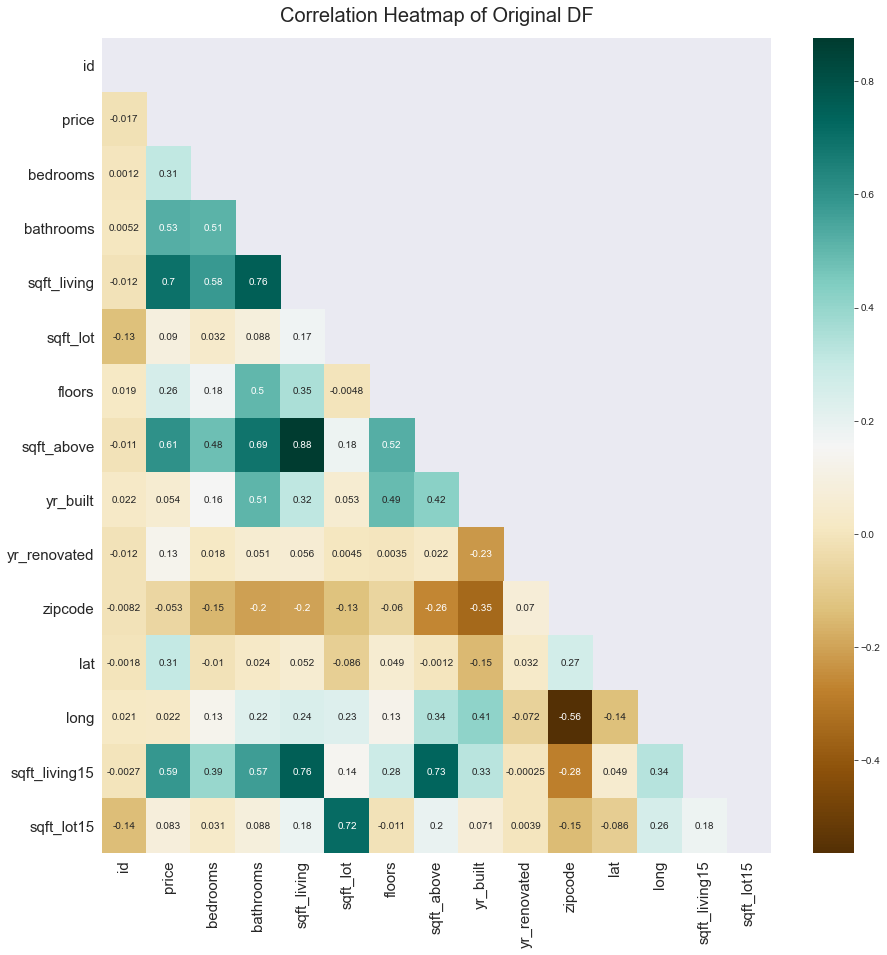

In [38]:
# original heat map with no changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    
    heatmap = sns.heatmap(df.corr(), annot=True, mask=mask, cmap='BrBG');
    
    plt.xticks( fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap.set_title('Correlation Heatmap of Original DF', fontdict={'fontsize':20}, pad=16);

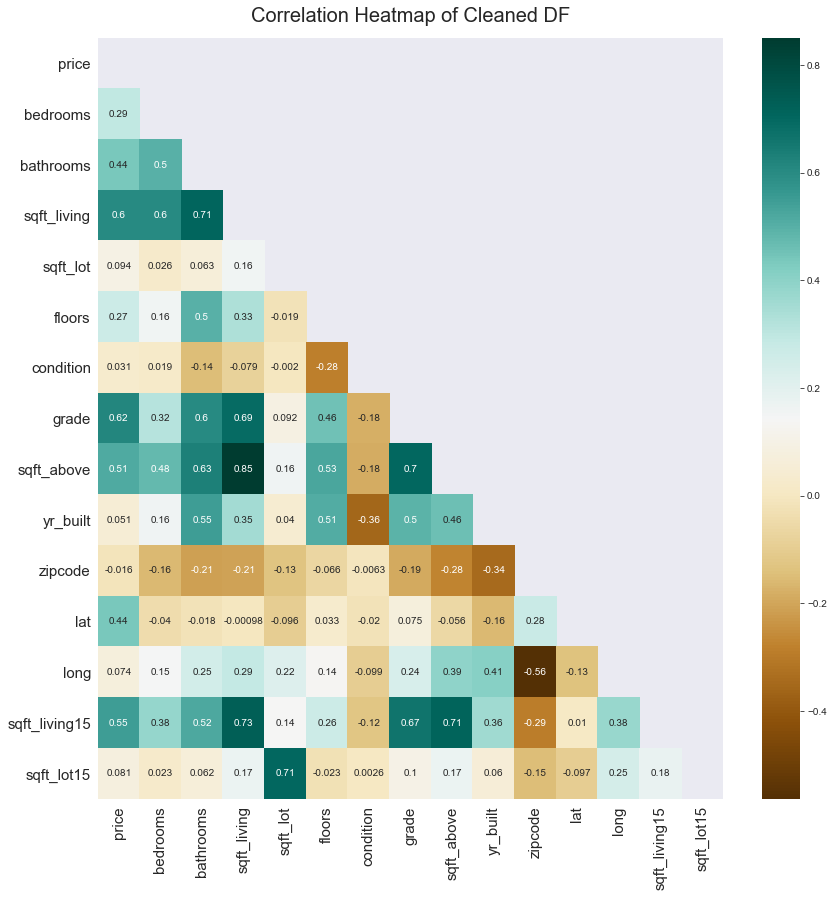

In [39]:
# new heatmap with changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(14,14))
    
    mask = np.triu(np.ones_like(df_clean.corr(), dtype=np.bool))
    
    plt.xticks( fontsize = 15)
    
    plt.yticks(fontsize = 15)
    
    heatmap = sns.heatmap(df_clean.corr(), annot=True, mask=mask, cmap = 'BrBG');
    
    heatmap.set_title('Correlation Heatmap of Cleaned DF', fontdict={'fontsize':20}, pad=16);

* Looking at the heat map you can see that the highet correlation indicators for price are **grade** at .62 and **sqft_living** at .60

In [40]:
# Showing highest correlations with price

df_clean_corr = df_clean.corr()["price"].map(abs).sort_values(ascending = False)
df_clean_corr

price           1.00
grade           0.62
sqft_living     0.60
sqft_living15   0.55
sqft_above      0.51
lat             0.44
bathrooms       0.44
bedrooms        0.29
floors          0.27
sqft_lot        0.09
sqft_lot15      0.08
long            0.07
yr_built        0.05
condition       0.03
zipcode         0.02
Name: price, dtype: float64

### 2.B Linear Regression Assumptions Test Functions

#### 2.B.1 Linearity Test

In [41]:
# modified from Jeff Macaluso's code regarding linear assumption testing

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the dependent variable. 
    """
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.set(rc = {'figure.figsize':(12,10)})
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height = 9)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()
    
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

#### 2.B.2

In [42]:
def normality(model, features, label):
    
    preds = model.predict(features)
    residuals = (label - preds)
    sns.set(rc = {'figure.figsize':(12,10)})
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    
    return

#### 2.B.3 Multicollinearity Test

In [43]:
def vif(features, label):
    
    label, features = dmatrices('label ~ features', data=training_data, return_type='dataframe')
    
    # make empty VIF dataframe
    vif = pd.DataFrame()
    vif["feature"] = features.columns

    # calculate VIF for each feature
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

    return vif

#### 2.B.4 Multicollinearity Test for New Model

In [44]:
def vif_new(feature, label):
    
    y, X = dmatrices('y ~ X', data=df_ohe_clean, return_type='dataframe')
    
    # make empty VIF dataframe
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    
    # calculate VIF for each feature
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif = vif[vif['feature']!='intercept']

    return vif

#### 2.B.5 Homoscedasticity Test

In [45]:
def homoscedasticity(model, features, label):

    fig, ax = plt.subplots(figsize=(20, 18))

    
    preds = model.predict(features)
    residuals = (label - preds)
    
    ax.scatter(preds, residuals, alpha=0.5)
    ax.plot(preds, [0 for i in range(len(features))])
    ax.set_xlabel("Predicted Value")
    ax.set_ylabel("Actual - Predicted Value");

    return

#### 2.B.6 Creating a functions for validating models

In [46]:
# Test Function for relevant information for train and test models
# First 7 lines of code taken from Xiaohua Su, jawwad Siddiqui, and Luke Dowker
# 6 lines of code taken from Hanis Zulmuthi, Greg Burgess, Kyle Weesner

def scoring(x,y):
    
    # Running a linear regression to get R^2 score in two ways and the RMSE
    lr = LinearRegression()
    lr.fit(x,y)
    y_pred = lr.predict(x)
    result = lr.score(x,y)
    result1 = r2_score(y,y_pred)
    rmse = mean_squared_error(y,y_pred, squared = False)
    
    
    #  Running the train-test validation 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)
    lr.fit(X_train,y_train)
    
    yhat_train = lr.predict(X_train)
    train_rmse = mean_squared_error(y_train, yhat_train, squared = False)
    
    yhat_test = lr.predict(X_test)
    test_rmse = mean_squared_error(y_test, yhat_test, squared = False)
    
    residuals_train = y_train - yhat_train
    
    residuals_test = y_test - yhat_test
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    
    # Running the Cross Validation
    scores_simple = cross_validate(
                    lr, X_train, y_train, cv=5, 
                    return_train_score=True)
    
    cross_validate_train = np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])
        
    cross_validate_test = np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])
    
    # Running the Shuffle Split Validation
    splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)
    baseline_scores = cross_validate(
                            estimator=lr,
                            X=X_train,
                            y=y_train,
                            return_train_score=True,
                            cv=splitter)
      
    shuffle_train = baseline_scores["train_score"].mean()
    shuffle_test = baseline_scores['test_score'].mean()
    
    print("Model train score is:", result) 
    print("Train r2_score is:", result1)
    print("The train RMSE is:" , rmse)
    print("The train-test train score is:" , train_score)
    print("The train-test test score is:" , test_score)
    print("The cross validation mean train and std score is:" , cross_validate_train)
    print("The cross validation mean test and std score is:" , cross_validate_test)
    print("The shuffle split mean train score is:" , shuffle_train)
    print("The shuffle split mean test score is:", shuffle_test)

#     Removed for now
#     return yhat_train, residuals_train, yhat_test, residuals_test

### 2.C Build a Baseline Model

In [47]:
training_data = df_clean.sample(frac = 0.75, random_state=25)
x_train = training_data.drop('price', axis=1)
y_train = training_data['price']

testing_data = df_clean.drop(training_data.index)
x_test = testing_data.drop('price', axis =1)
y_test = testing_data['price']

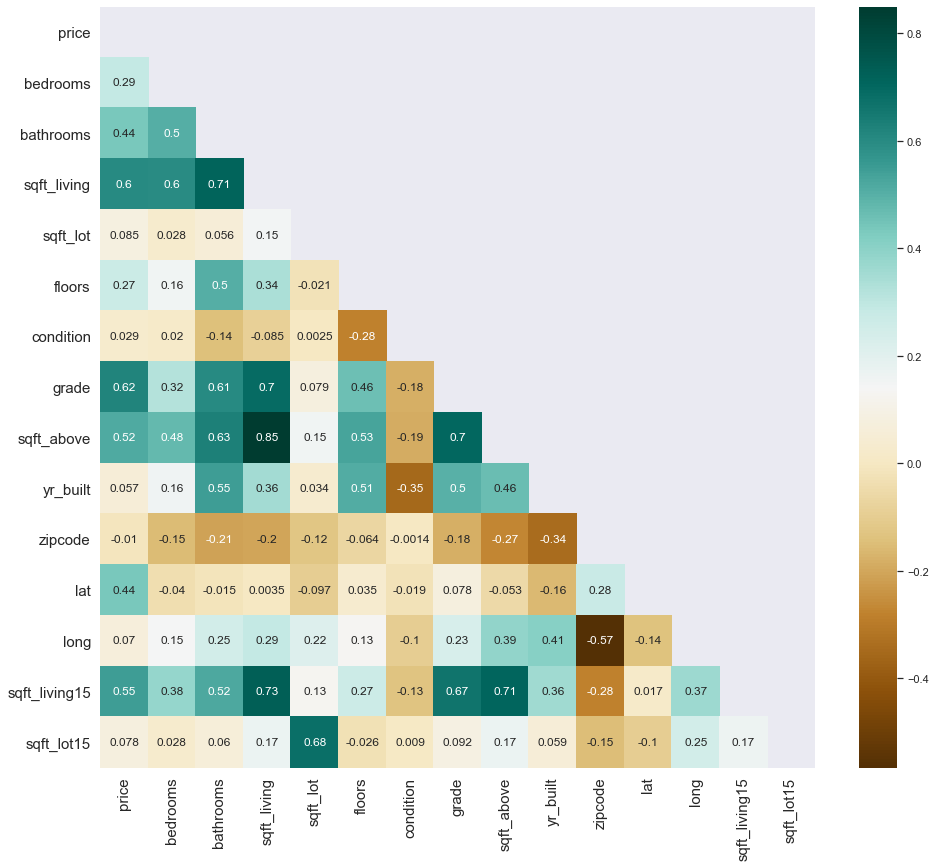

In [48]:
heatmap_data = pd.concat([y_train, x_train], axis=1)
corr = heatmap_data.corr()
mask = np.triu(np.ones_like(heatmap_data.corr(), dtype=np.bool))
sns.set(rc={'figure.figsize':(16, 14)})
plt.xticks( fontsize = 15)
plt.yticks(fontsize = 15)
sns.heatmap(data=corr, annot=True, mask = mask, cmap= "BrBG");
heatmap.set_title('Correlation Heatmap of Baseline Model', fontdict={'fontsize':20}, pad=16);

In [49]:
price_corrs = heatmap_data.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price           1.00
grade           0.62
sqft_living     0.60
sqft_living15   0.55
sqft_above      0.52
bathrooms       0.44
lat             0.44
bedrooms        0.29
floors          0.27
sqft_lot        0.09
sqft_lot15      0.08
long            0.07
yr_built        0.06
condition       0.03
zipcode         0.01
Name: price, dtype: float64

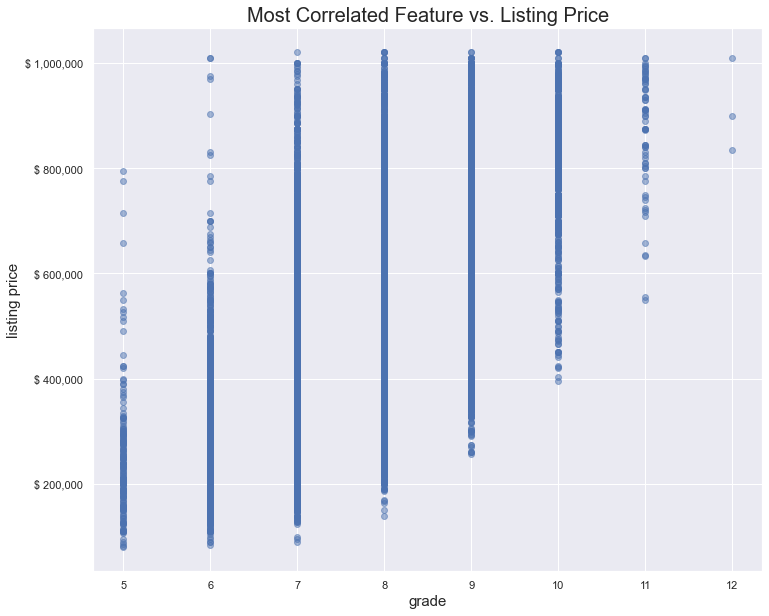

In [50]:
# Start with the simpliest variable grade and build our baseline model
most_correlated_feature = "grade"
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(x_train[most_correlated_feature], y_train, alpha=0.5)
plt.ticklabel_format(style = 'plain', axis = 'y')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter((lambda x, pos: '$ {:,.0f}'.format(x))))
ax.set_xlabel(most_correlated_feature, fontsize = 15)
ax.set_ylabel("listing price", fontsize = 15)
ax.set_title("Most Correlated Feature vs. Listing Price", fontsize = 20);

In [51]:
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.75, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

baseline_model = LinearRegression()

# Fit the model on X_train_final and y_train
baseline_model = baseline_model.fit(x_train[[most_correlated_feature]], y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
print("The test score is: ", baseline_model.score(x_test[[most_correlated_feature]], y_test))

Train score:      0.3819089384909741
Validation score: 0.3840728638278545
The test score is:  0.36964908502806093


#### 2.C.1 Running Assumption Tests on Baseline Model

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


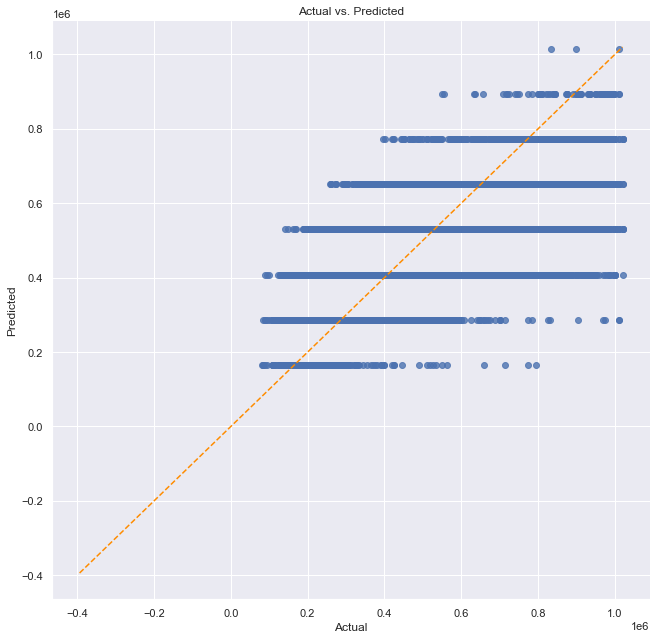

In [52]:
# Running Assumption test
linear_assumption(baseline_model, x_train[[most_correlated_feature]], y_train)

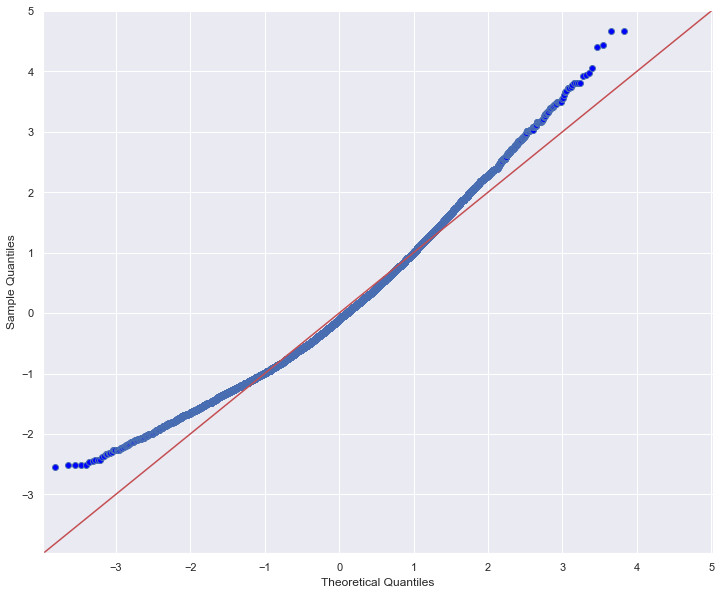

In [53]:
normality(baseline_model, x_train[[most_correlated_feature]], y_train)

* We do not need to run multicollinearity and homoscedasticity tests on baseline model because it is a single variable regression.

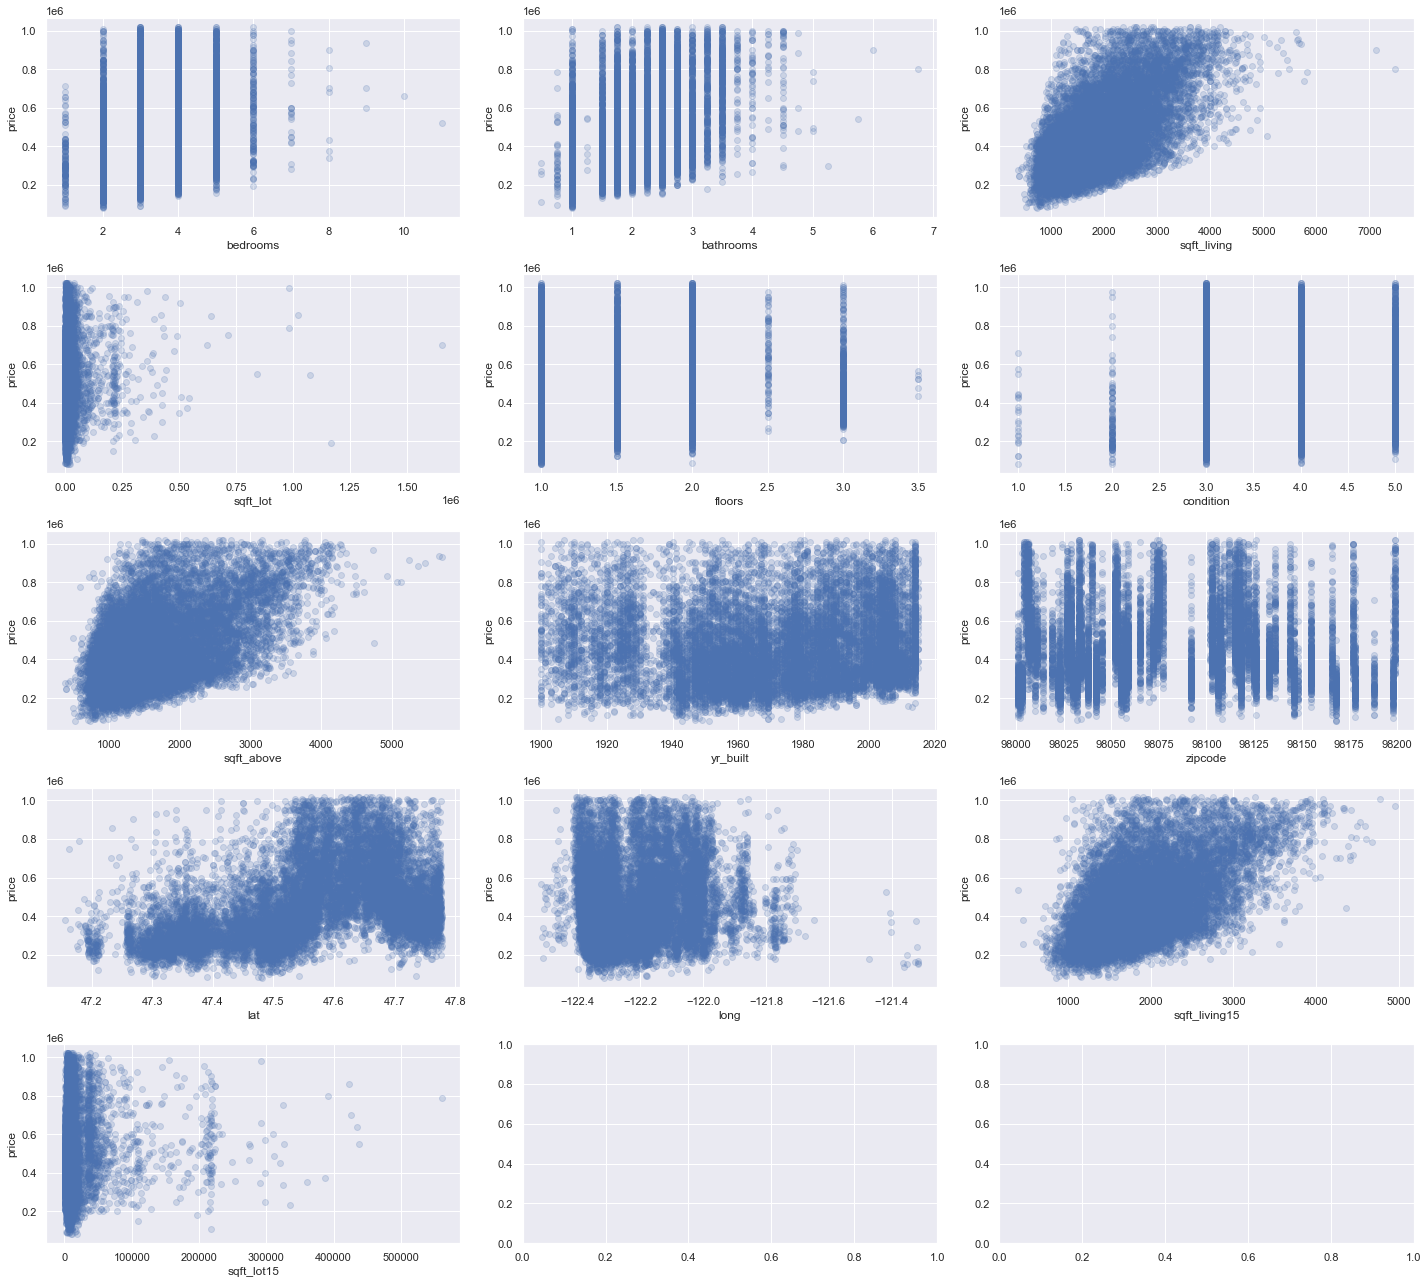

In [54]:
# Exploring the rest of the columns

x_train_numeric = x_train.copy()
scatterplot_data = x_train_numeric.drop("grade", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 18))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(x_train_numeric[col], y_train, alpha=0.2) 
    ax.set_xlabel(col)
    ax.set_ylabel("price")

### 2.D Running Second Model

In [55]:
# based on heatmap, we dropped variables that have correlation over 0.7 with another independent variables to minimize 
# multicollinearity. 

x_train_second_model = x_train_numeric.drop('bathrooms', axis=1).copy()
x_train_second_model = x_train_second_model.drop('sqft_living15', axis=1).copy()
x_train_second_model = x_train_second_model.drop('sqft_above', axis=1).copy()
x_train_second_model.head(5)

,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_lot15
21032,4,2500,4945,2.00,3,9,2013,98065,47.52,-121.89,6000
5703,4,2810,10433,2.00,3,8,2001,98022,47.19,-122.02,9240
4812,4,2240,7245,1.00,4,7,1972,98034,47.72,-122.17,7350
20011,4,3230,4838,2.00,3,9,2014,98038,47.36,-122.02,5094
15972,2,1150,30184,1.00,3,6,1950,98055,47.45,-122.20,19684


In [56]:
second_model = LinearRegression()
second_model = second_model.fit(x_train_second_model, y_train)

second_model_scores = cross_validate(
    estimator=second_model,
    X=x_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6663320719016509
Validation score: 0.6675991358162161

Baseline Model
Train score:      0.3819089384909741
Validation score: 0.3840728638278545


#### 2.D.1 Running Assumption Tests on the 2nd Model

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


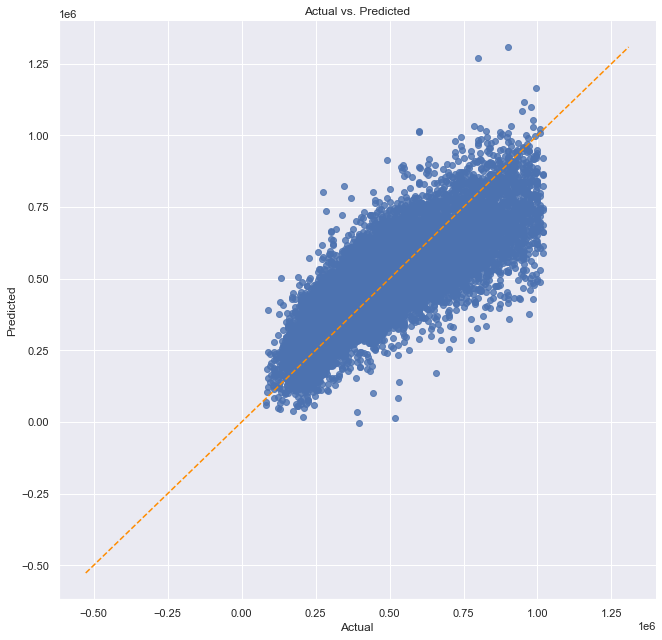

In [57]:
linear_assumption(second_model, x_train_second_model, y_train)

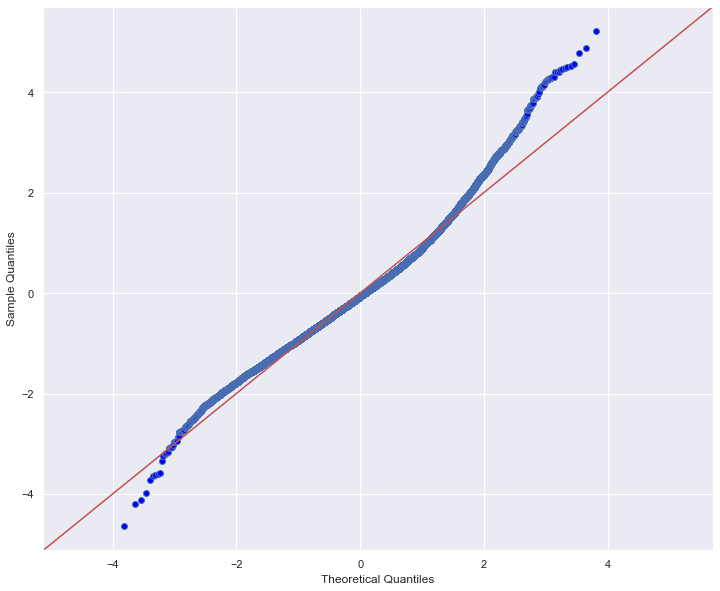

In [58]:
normality(second_model, x_train_second_model, y_train)

In [59]:
vif(x_train_second_model, y_train)

,feature,VIF
0,Intercept,4228801.84
1,features[0],1.64
2,features[1],2.95
3,features[2],1.88
4,features[3],1.53
5,features[4],1.19
6,features[5],2.46
7,features[6],2.02
8,features[7],1.63
9,features[8],1.15


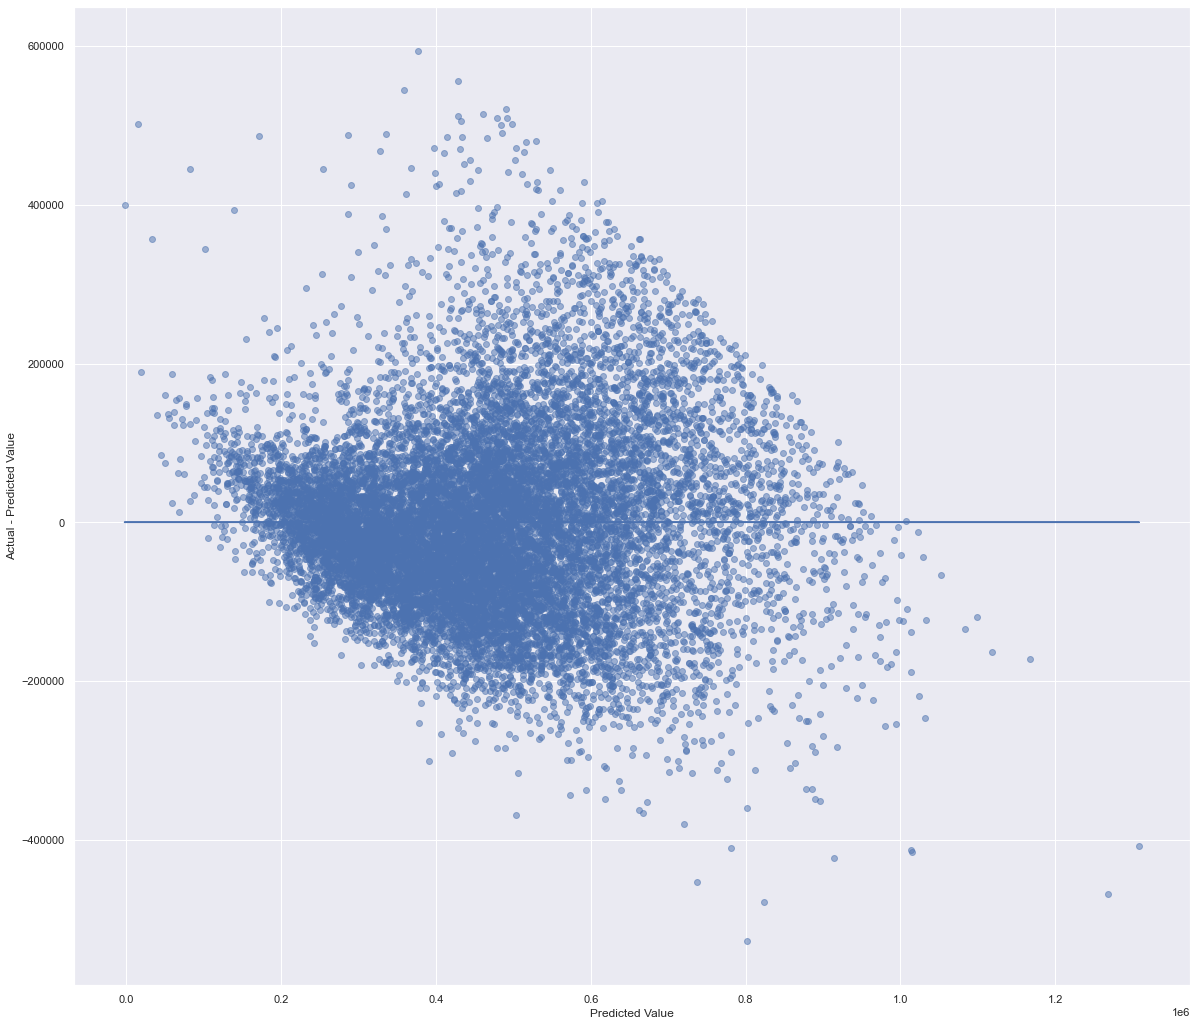

In [60]:
homoscedasticity(second_model, x_train_second_model, y_train)

* Our 2nd model perform relatively well under assumtion tests, so the model has achieved statistical significance with R-squared = 66.4%. We will keep tuning our model to improve R-squared number.

### 2.E Selecting the best combination of features using LR

In [61]:
sm.OLS(y_train, sm.add_constant(x_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     2738.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:52   Log-Likelihood:            -1.9573e+05
No. Observations:               14985   AIC:                         3.915e+05
Df Residuals:                   14973   BIC:                         3.916e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.193e+06   1.91e+06     -3.236      0.001   -9.94e+06   -2.44e+06
bedrooms    -1.088e+04   1357.241     -8.019      0.000   -1.35e+04   -8222.717
sqft_living   102.7592      2.110     48.709      0.000      98.624     106.894
sqft_lot        0.2064      0.031      6.679      0.000       0.146       0.267
floors        3.46e+04   2142.300     16.151      0.000    3.04e+04    3.88e+04
condition    2.449e+04   1566.695     15.632      0.000    2.14e+04    2.76e+04
grade        8.275e+04   1447.267     57.174      0.000    7.99e+04    8.56e+04
yr_built    -1747.5076     45.453    -38.446      0.000   -1836.602   -1658.413
zipcode      -192.8991     22.273     -8.661      0.000    -236.556    -149.242
lat          5.246e+05   7028.088     74.642      0.000    5.11e+05    5.38e+05
long        -2.581e+04   8580.350     -3.008      0.003   -4.26e+04   -8991.130
sqft_lot15     -0.0381      0.050     -0.758      0.449      -0.137       0.060
==============================================================================
Omnibus:                     1135.044   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1862.648
Skew:                           0.581   Prob(JB):                         0.00
Kurtosis:                       4.278   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.F  Run the 3rd Model

In [62]:
# drop p-value > 0.05, so sqft_lot15 will be dropped.

significant_features = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 
                        'condition', 'grade', 'yr_built', 'zipcode', 'lat', 'long'] 
third_model = LinearRegression()
x_train_third_model = x_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=x_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6662386173861351
Validation score: 0.6676685578962408

Second Model
Train score:      0.6663320719016509
Validation score: 0.6675991358162161

Baseline Model
Train score:      0.3819089384909741
Validation score: 0.3840728638278545


### 2.G RFE Approach

In [63]:

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
x_train_for_RFECV = StandardScaler().fit_transform(x_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(x_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
sqft_living: True
sqft_lot: True
floors: True
condition: True
grade: True
yr_built: True
zipcode: True
lat: True
long: True


In [64]:
best_features = significant_features
x_train_final = x_train[best_features]
x_test_final = x_test[best_features]

final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model = final_model.fit(x_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
print("The test score is: ", final_model.score(x_test_final, y_test))
print("The RMSE for the test is: ", mean_squared_error(y_test, final_model.predict(x_test_final), squared=False))

The test score is:  0.669867320406403
The RMSE for the test is:  112824.4695959978


In [65]:
print(pd.Series(final_model.coef_, index=x_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms      -10817.96
sqft_living      102.62
sqft_lot           0.19
floors         34674.39
condition      24472.23
grade          82757.98
yr_built       -1747.35
zipcode         -192.96
lat           524772.03
long          -26494.38
Name: Coefficients, dtype: float64

Intercept: -6279610.979034686


#### 2.G.1 Running Assumption Test for the Final Model pre One Hot Encoder

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


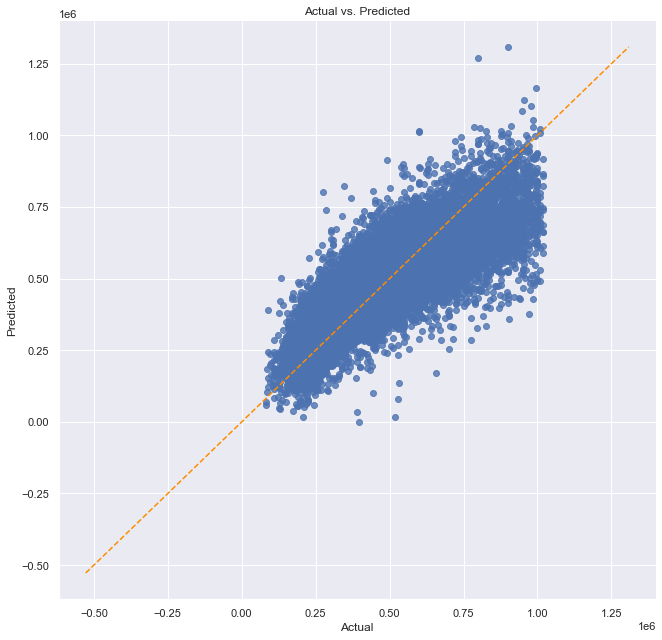

In [66]:
linear_assumption(final_model, x_train_final, y_train)


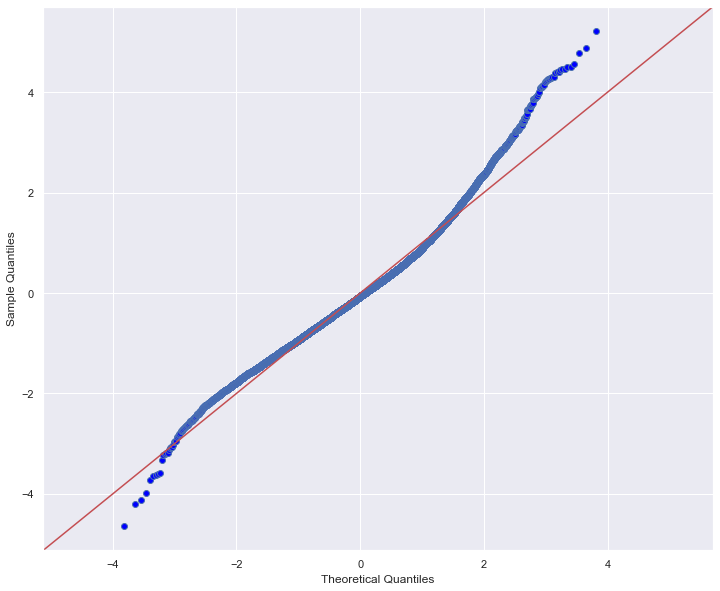

In [67]:
normality(final_model, x_train_final, y_train)

In [68]:
vif(x_train_final, y_train)

,feature,VIF
0,Intercept,4213546.16
1,features[0],1.64
2,features[1],2.93
3,features[2],1.09
4,features[3],1.53
5,features[4],1.19
6,features[5],2.46
7,features[6],2.02
8,features[7],1.63
9,features[8],1.15


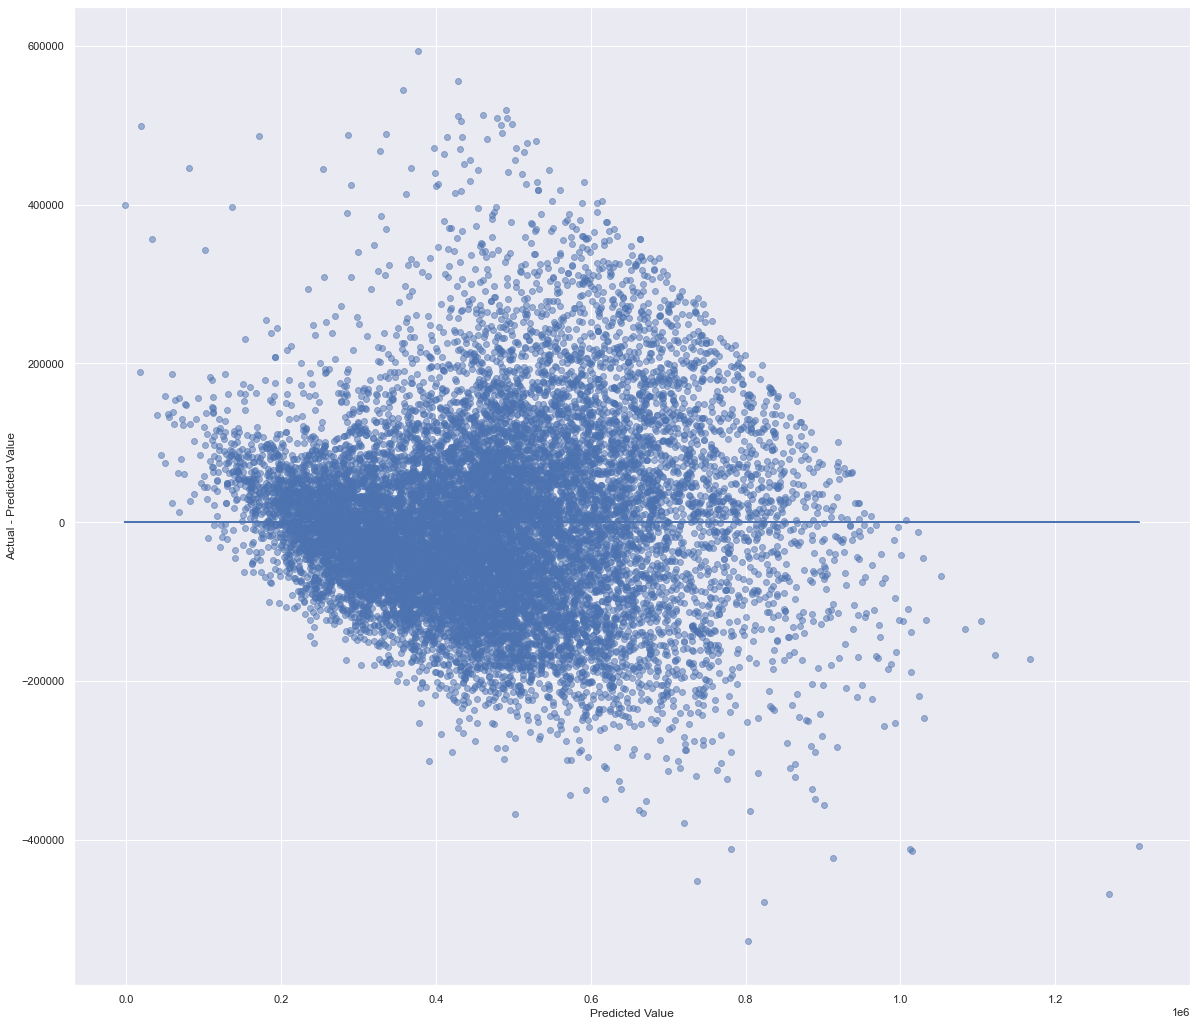

In [69]:
homoscedasticity(final_model, x_train_final, y_train)

## 3. Model Construction with OneHotEncoder on Zipcode

* Setting up a OneHotEncoder for ZipCode because it doesn't work well as a scalar data and it's correlation is lower than what is expected from real world knowledge, categorizing it should help aleviate this problem

In [70]:
# Resetting the index because of the previous changes in the data will effect the indexing

df_clean = df_clean.reset_index()

# Applying the OneHotEncoder and making a new dataframe

encoder = OneHotEncoder()

zipcode_trans = encoder.fit_transform(df_clean['zipcode'].values.reshape(-1,1))
zipcode_trans.todense()
encoder.get_feature_names()
zipcode_df =pd.DataFrame(zipcode_trans.todense(), columns = encoder.get_feature_names())
zipcode_df
df_ohe_clean = df_clean.join(zipcode_df)

In [71]:
# Sanity check

df_ohe_clean

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19976,21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [72]:
# Dropping Index for  One Hot Encoder df and clean df

df_ohe_clean = df_ohe_clean.drop('index', axis = 1)

df_clean = df_clean.drop('index', axis = 1)

In [73]:
# Sanity check

df_ohe_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19976,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [74]:
# Info of df OneHotEncoder

df_ohe_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19980 non-null  float64
 1   bedrooms       19980 non-null  int64  
 2   bathrooms      19980 non-null  float64
 3   sqft_living    19980 non-null  int64  
 4   sqft_lot       19980 non-null  int64  
 5   floors         19980 non-null  float64
 6   condition      19980 non-null  int64  
 7   grade          19980 non-null  int64  
 8   sqft_above     19980 non-null  int64  
 9   yr_built       19980 non-null  int64  
 10  zipcode        19980 non-null  int64  
 11  lat            19980 non-null  float64
 12  long           19980 non-null  float64
 13  sqft_living15  19980 non-null  int64  
 14  sqft_lot15     19980 non-null  int64  
 15  x0_98001       19980 non-null  float64
 16  x0_98002       19980 non-null  float64
 17  x0_98003       19980 non-null  float64
 18  x0_980

### 3.A Regression Testing

In [75]:
# Regression Testing on original clean data set with all features

endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:54   Log-Likelihood:            -2.5475e+05
No. Observations:               19980   AIC:                         5.097e+05
Df Residuals:                   19897   BIC:                         5.103e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -521.0654     38.813    -13.425      0.000    -597.142    -444.988
bedrooms      -5137.5519    895.420     -5.738      0.000   -6892.650   -3382.453
bathrooms      1.674e+04   1460.070     11.468      0.000    1.39e+04    1.96e+04
sqft_living      67.2963      2.085     32.281      0.000      63.210      71.382
sqft_lot          0.2995      0.021     14.266      0.000       0.258       0.341
floors         -1.33e+04   1741.892     -7.638      0.000   -1.67e+04   -9889.570
condition      2.177e+04   1035.361     21.030      0.000    1.97e+04    2.38e+04
grade          4.446e+04   1030.681     43.134      0.000    4.24e+04    4.65e+04
sqft_above       38.4059      2.099     18.297      0.000      34.292      42.520
yr_built       -673.1347     34.032    -19.779      0.000    -739.841    -606.429
zipcode        -148.2874     33.647     -4.407      0.000    -214.239     -82.336
lat            1.485e+05   3.42e+04      4.345      0.000    8.15e+04    2.15e+05
long          -7.042e+04   2.43e+04     -2.894      0.004   -1.18e+05   -2.27e+04
sqft_living15    42.0015      1.687     24.898      0.000      38.695      45.308
sqft_lot15        0.0105      0.033      0.318      0.751      -0.054       0.075
x0_98001      -1.567e+05   9382.595    -16.699      0.000   -1.75e+05   -1.38e+05
x0_98002      -1.465e+05   9694.059    -15.113      0.000   -1.66e+05   -1.28e+05
x0_98003       -1.64e+05   9960.868    -16.469      0.000   -1.84e+05   -1.45e+05
x0_98004       2.822e+05   7974.352     35.390      0.000    2.67e+05    2.98e+05
x0_98005        1.21e+05   7591.463     15.944      0.000    1.06e+05    1.36e+05
x0_98006       7.705e+04   4630.227     16.640      0.000     6.8e+04    8.61e+04
x0_98007       5.276e+04   7874.098      6.700      0.000    3.73e+04    6.82e+04
x0_98008       4.884e+04   6105.527      7.999      0.000    3.69e+04    6.08e+04
x0_98010      -5.697e+04   1.09e+04     -5.227      0.000   -7.83e+04   -3.56e+04
x0_98011        -7.9e+04   1.01e+04     -7.852      0.000   -9.87e+04   -5.93e+04
x0_98014      -7.351e+04   1.18e+04     -6.237      0.000   -9.66e+04   -5.04e+04
x0_98019      -9.936e+04   1.06e+04     -9.340      0.000    -1.2e+05   -7.85e+04
x0_98022      -1.094e+05   1.24e+04     -8.802      0.000   -1.34e+05    -8.5e+04
x0_98023      -1.841e+05   1.02e+04    -17.975      0.000   -2.04e+05   -1.64e+05
x0_98024      -1.932e+04   1.16e+04     -1.666      0.096   -4.21e+04    3412.721
x0_98027       1.498e+04   5014.975      2.986      0.003    5145.958    2.48e+04
x0_98028      -8.681e+04   9365.845     -9.269      0.000   -1.05e+05   -6.85e+04
x0_98029       5.124e+04   6128.658      8.360      0.000    3.92e+04    6.33e+04
x0_98030      -1.534e+05   7749.244    -19.800      0.000   -1.69e+05   -1.38e+05
x0_98031      -1.542e+05   6809.029    -22.654   

#### 3.A.1 Scoring on our new model with One Hot Encoder

In [76]:
# Compute our model test score. The score is great, but we need to check if our model is reliable enough to provdie 
# statisticlly significant result.

X = df_ohe_clean.drop('price', axis = 1)
y = df_ohe_clean.price
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.820662989994505
0.8223052436581175


In [77]:
# Calculate the RMSE measure.
lr = LinearRegression()
lr.fit(X,y)
                  
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

83390.6497955628
83390.64979556263


In [78]:
#Scoring Stats

scoring(X,y)

Model train score is: 0.8213482442824492
Train r2_score is: 0.8213482442824492
The train RMSE is: 83390.64979556263
The train-test train score is: 0.820662989994505
The train-test test score is: 0.8223052436581175
The cross validation mean train and std score is: (0.8208918829671029, 0.0017724763570335852)
The cross validation mean test and std score is: (0.8183411268896219, 0.006969154955796542)
The shuffle split mean train score is: 0.8217970263102962
The shuffle split mean test score is: 0.8153074734058402


#### 3.A.2 Assumption Tests with New Model

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


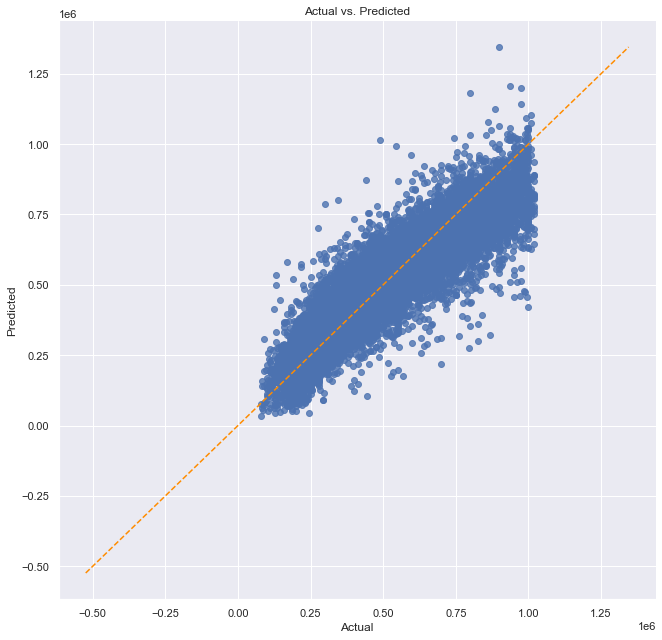

In [79]:
linear_assumption(lr, X, y)

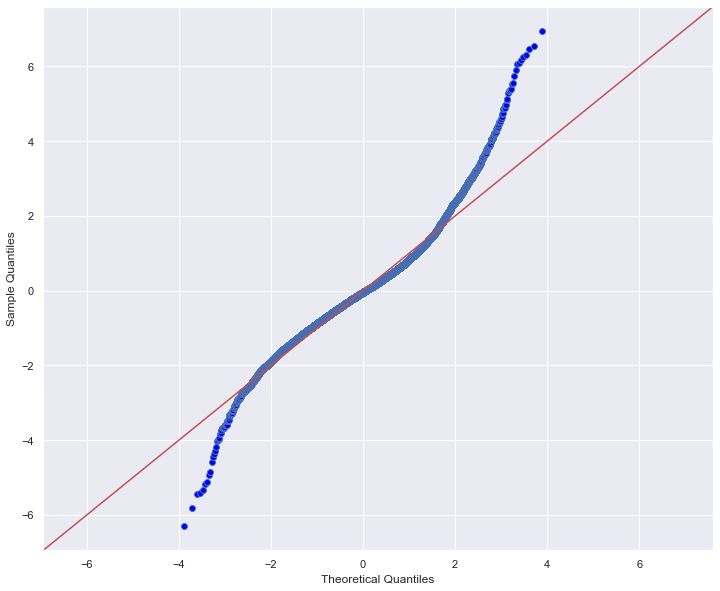

In [80]:
normality(lr, X, y)

In [81]:
# It seems that we are seeing some zeros that cause inf problem. It's not a big deal as we will tune our model and make it 
# more reliable.
vif_new(X, y)

C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\anguy\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Intercept,0.00
1,X[0],1.77
2,X[1],3.00
3,X[2],7.11
4,X[3],2.03
...,...,...
80,X[79],inf
81,X[80],inf
82,X[81],inf
83,X[82],inf


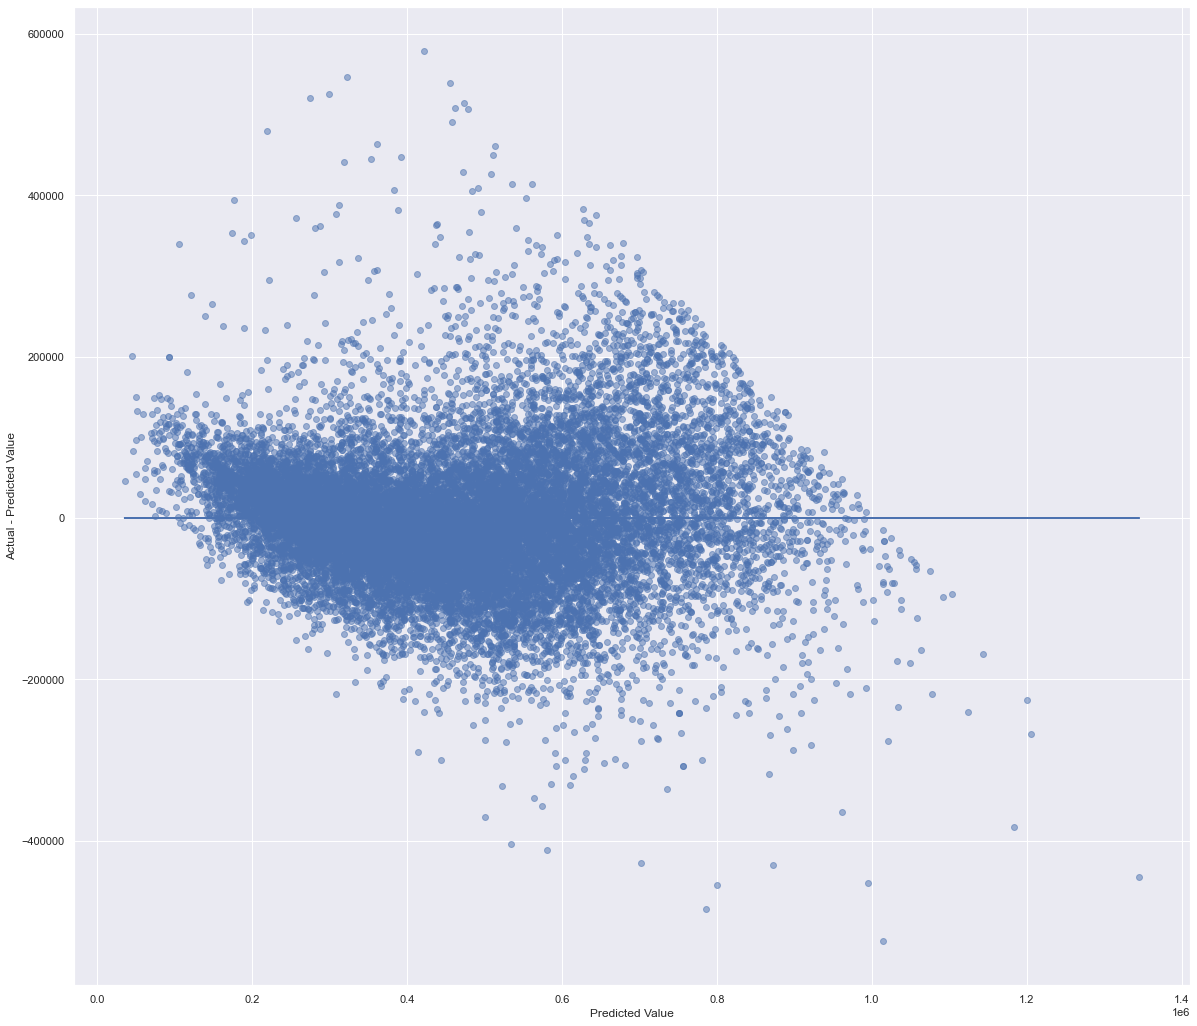

In [82]:
homoscedasticity(lr, X, y)

* Dropping p-values > .05 and test if the model improves

### 3.B Improving Model

In [83]:
endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price', "sqft_lot15", "x0_98024",
                                         "x0_98070", "x0_98125"], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1144.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:06   Log-Likelihood:            -2.5475e+05
No. Observations:               19980   AIC:                         5.097e+05
Df Residuals:                   19899   BIC:                         5.103e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.431e+07   1.18e+07     -1.212      0.226   -3.75e+07    8.84e+06
bedrooms      -5140.4024    894.319     -5.748      0.000   -6893.342   -3387.463
bathrooms      1.673e+04   1459.505     11.465      0.000    1.39e+04    1.96e+04
sqft_living      67.3224      2.083     32.320      0.000      63.240      71.405
sqft_lot          0.3034      0.016     18.797      0.000       0.272       0.335
floors        -1.331e+04   1741.102     -7.643      0.000   -1.67e+04   -9894.063
condition      2.177e+04   1035.154     21.033      0.000    1.97e+04    2.38e+04
grade          4.446e+04   1030.608     43.137      0.000    4.24e+04    4.65e+04
sqft_above       38.3892      2.098     18.295      0.000      34.276      42.502
yr_built       -673.4296     34.019    -19.796      0.000    -740.109    -606.750
zipcode           0.7921    138.988      0.006      0.995    -271.636     273.220
lat             1.53e+05   2.96e+04      5.171      0.000     9.5e+04    2.11e+05
long          -6.599e+04   1.89e+04     -3.484      0.000   -1.03e+05   -2.89e+04
sqft_living15    42.0366      1.684     24.961      0.000      38.736      45.338
x0_98001      -1.306e+05    1.2e+04    -10.926      0.000   -1.54e+05   -1.07e+05
x0_98002      -1.209e+05   1.23e+04     -9.798      0.000   -1.45e+05   -9.67e+04
x0_98003      -1.382e+05   1.22e+04    -11.288      0.000   -1.62e+05   -1.14e+05
x0_98004       3.061e+05   1.48e+04     20.743      0.000    2.77e+05    3.35e+05
x0_98005       1.447e+05   1.43e+04     10.130      0.000    1.17e+05    1.73e+05
x0_98006       1.007e+05   1.23e+04      8.182      0.000    7.66e+04    1.25e+05
x0_98007       7.598e+04   1.41e+04      5.371      0.000    4.83e+04    1.04e+05
x0_98008       7.178e+04    1.3e+04      5.520      0.000    4.63e+04    9.73e+04
x0_98010      -3.336e+04   1.31e+04     -2.538      0.011   -5.91e+04   -7598.040
x0_98011      -5.676e+04    1.6e+04     -3.547      0.000   -8.81e+04   -2.54e+04
x0_98014      -5.257e+04   1.41e+04     -3.717      0.000   -8.03e+04   -2.48e+04
x0_98019      -7.914e+04   1.37e+04     -5.762      0.000   -1.06e+05   -5.22e+04
x0_98022      -8.706e+04   1.27e+04     -6.876      0.000   -1.12e+05   -6.22e+04
x0_98023      -1.609e+05   1.05e+04    -15.326      0.000   -1.82e+05    -1.4e+05
x0_98027       3.529e+04   9452.783      3.733      0.000    1.68e+04    5.38e+04
x0_98028      -6.691e+04   1.39e+04     -4.822      0.000   -9.41e+04   -3.97e+04
x0_98029        7.08e+04   9897.391      7.153      0.000    5.14e+04    9.02e+04
x0_98030      -1.323e+05   9784.721    -13.526      0.000   -1.52e+05   -1.13e+05
x0_98031      -1.335e+05   9456.634    -14.115      0.000   -1.52e+05   -1.15e+05
x0_98032      -1.488e+05   1.12e+04    -13.253      0.000   -1.71e+05   -1.27e+05
x0_98033       1.268e+05   1.12e+04     11.296   

* Slowly improving condition number, but still a very high sign of mulitcollinearity, drop by a factor of 10^10.

In [84]:
X =df_ohe_clean.drop(['price', "sqft_lot15", "x0_98024", 
                      "x0_98070", "x0_98125"], axis =1)
y = df_ohe_clean.price

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.820657393313226
0.8223222631585867


In [85]:
lr = LinearRegression()
lr.fit(X,y)
                  
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

83391.00380980053
83391.00380980072


In [86]:
# Scoring Stats

scoring(X,y)

Model train score is: 0.8213467274361461
Train r2_score is: 0.8213467274361461
The train RMSE is: 83391.00380980072
The train-test train score is: 0.820657393313226
The train-test test score is: 0.8223222631585867
The cross validation mean train and std score is: (0.8208789078829233, 0.0017642699394526673)
The cross validation mean test and std score is: (0.8184029186736442, 0.006917847718734713)
The shuffle split mean train score is: 0.821758512026205
The shuffle split mean test score is: 0.8155212524696581


#### 3.B.1 Running Assumption Tests on the Improved Model

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


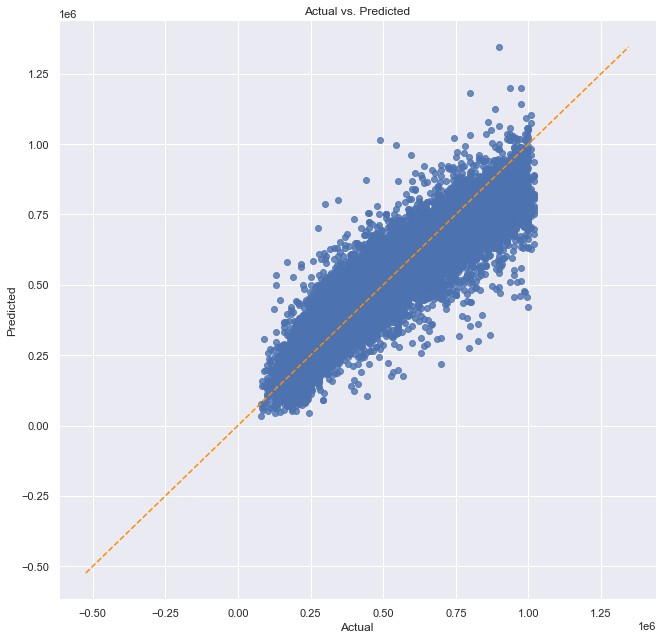

In [87]:
linear_assumption(lr, X, y)

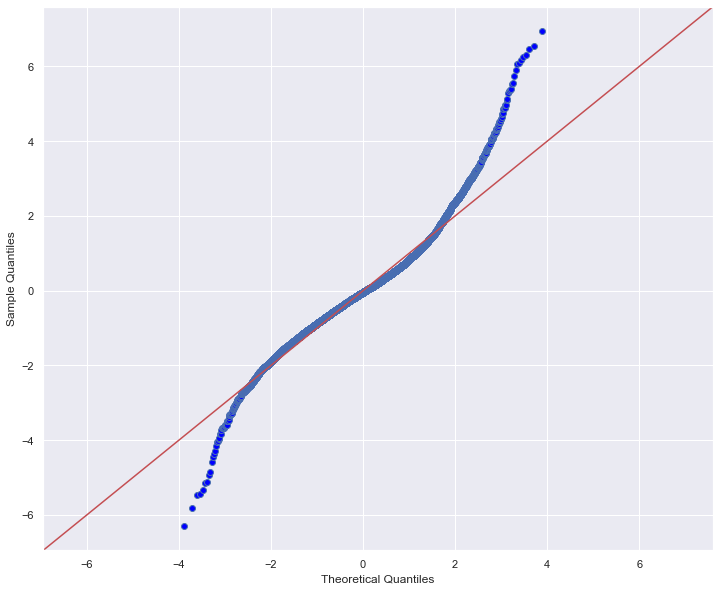

In [88]:
normality(lr, X, y)

In [89]:
vif_new(X, y)

,feature,VIF
0,Intercept,398960168.77
1,X[0],1.77
2,X[1],3.00
3,X[2],7.10
4,X[3],1.20
...,...,...
76,X[75],3.49
77,X[76],8.53
78,X[77],6.32
79,X[78],14.86


In [90]:
vif_new(X,y).sort_values('VIF', ascending=False)

,feature,VIF
0,Intercept,398960168.77
10,X[9],156.89
11,X[10],50.24
12,X[11],20.83
79,X[78],14.86
...,...,...
6,X[5],1.28
4,X[3],1.20
59,X[58],1.17
53,X[52],1.17


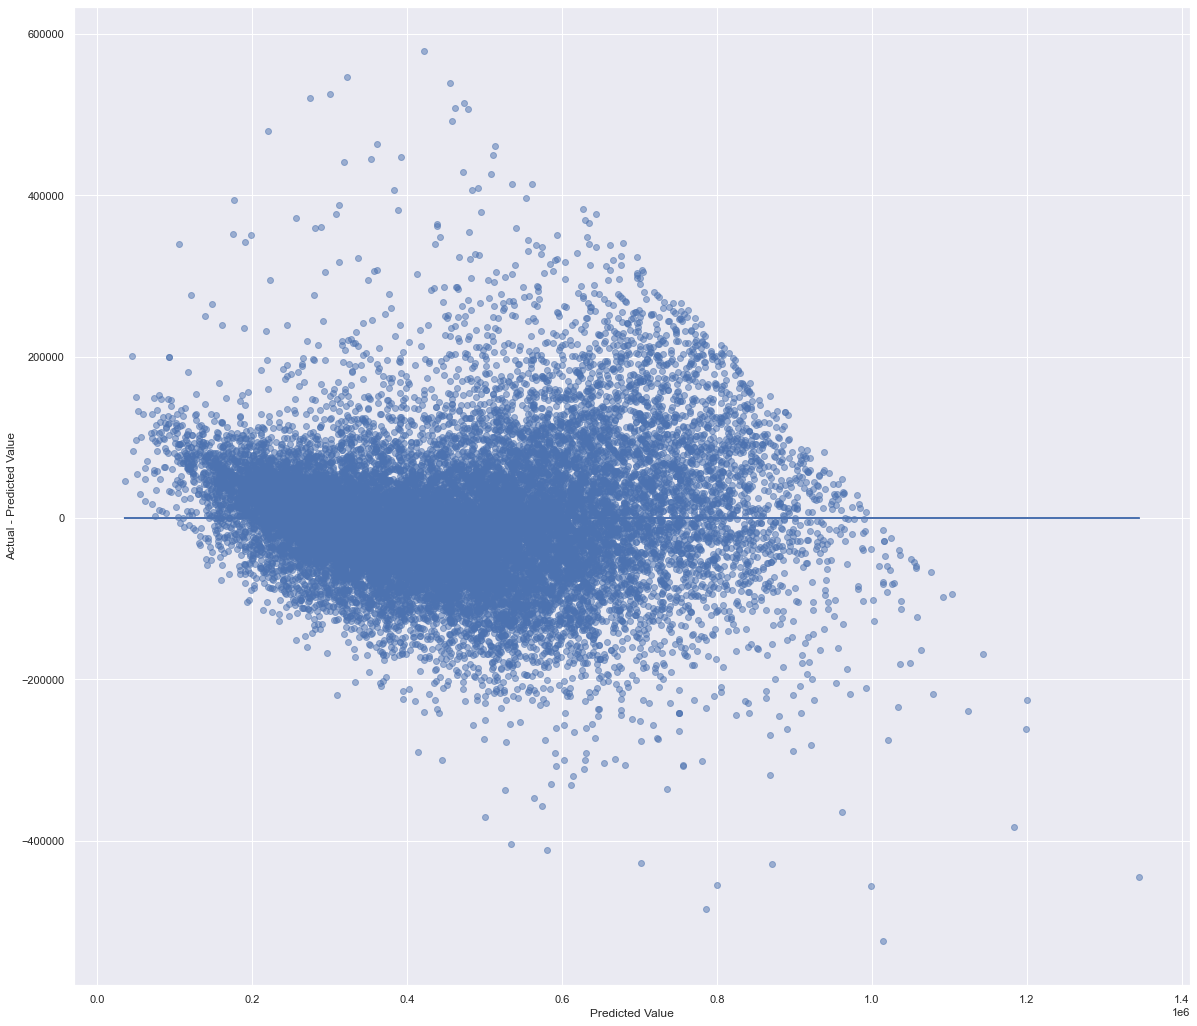

In [91]:
homoscedasticity(lr, X, y)

### 3.C Finding best One Hot Encoder Model

In [92]:
# Since we have mullticollinearity problem that is reflected on VIF scores. Instead of dropping them altogether, we started by
# dropping the variable with the highest vif score one by one. In this way, we can see how model reacts without remove 
# significant variable.

X = df_ohe_clean.drop(['price',"zipcode", "lat", "long", 
                       "sqft_lot15", "x0_98024", "x0_98070", 
                       "x0_98125", "x0_98027", "x0_98034", 
                       "sqft_above", "floors"], axis =1)
vif_new(X,y).sort_values('VIF', ascending=False)

,feature,VIF
0,Intercept,10970.44
3,X[2],4.45
6,X[5],2.94
8,X[7],2.87
2,X[1],2.84
...,...,...
52,X[51],1.07
46,X[45],1.07
17,X[16],1.07
65,X[64],1.04


In [93]:
# Checking the conditional number and see if it improves.
endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price',"zipcode", "lat", "long", 
                                          "sqft_lot15", "x0_98024", "x0_98070", 
                                          "x0_98125", "x0_98027", "x0_98034", 
                                          "sqft_above", "floors" ], axis =1))

lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1225.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:32   Log-Likelihood:            -2.5494e+05
No. Observations:               19980   AIC:                         5.100e+05
Df Residuals:                   19906   BIC:                         5.106e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.215e+06   6.25e+04     19.434      0.000    1.09e+06    1.34e+06
bedrooms      -4969.0188    901.302     -5.513      0.000   -6735.646   -3202.392
bathrooms        1.3e+04   1431.788      9.078      0.000    1.02e+04    1.58e+04
sqft_living      90.3184      1.665     54.241      0.000      87.055      93.582
sqft_lot          0.2915      0.016     18.225      0.000       0.260       0.323
condition      1.971e+04   1032.860     19.087      0.000    1.77e+04    2.17e+04
grade          4.806e+04   1017.429     47.233      0.000    4.61e+04    5.01e+04
yr_built       -727.2927     32.265    -22.541      0.000    -790.536    -664.050
sqft_living15    45.7980      1.679     27.278      0.000      42.507      49.089
x0_98001      -1.777e+05   4980.657    -35.681      0.000   -1.87e+05   -1.68e+05
x0_98002       -1.69e+05   6437.138    -26.246      0.000   -1.82e+05   -1.56e+05
x0_98003      -1.841e+05   5535.343    -33.256      0.000   -1.95e+05   -1.73e+05
x0_98004       2.929e+05   7542.376     38.831      0.000    2.78e+05    3.08e+05
x0_98005       1.317e+05   7319.631     17.994      0.000    1.17e+05    1.46e+05
x0_98006       7.697e+04   4920.685     15.641      0.000    6.73e+04    8.66e+04
x0_98007       6.365e+04   7685.995      8.281      0.000    4.86e+04    7.87e+04
x0_98008       5.771e+04   5658.477     10.199      0.000    4.66e+04    6.88e+04
x0_98010      -9.029e+04   8821.995    -10.234      0.000   -1.08e+05    -7.3e+04
x0_98011      -4.276e+04   6473.696     -6.605      0.000   -5.55e+04   -3.01e+04
x0_98014      -6.885e+04   8188.355     -8.409      0.000   -8.49e+04   -5.28e+04
x0_98019      -7.999e+04   6533.879    -12.243      0.000   -9.28e+04   -6.72e+04
x0_98022      -1.629e+05   6022.926    -27.040      0.000   -1.75e+05   -1.51e+05
x0_98023      -2.047e+05   4409.098    -46.417      0.000   -2.13e+05   -1.96e+05
x0_98028      -5.163e+04   5513.829     -9.363      0.000   -6.24e+04   -4.08e+04
x0_98029       4.312e+04   5342.572      8.071      0.000    3.26e+04    5.36e+04
x0_98030      -1.749e+05   5752.486    -30.403      0.000   -1.86e+05   -1.64e+05
x0_98031      -1.726e+05   5595.734    -30.838      0.000   -1.84e+05   -1.62e+05
x0_98032      -1.903e+05   7961.586    -23.903      0.000   -2.06e+05   -1.75e+05
x0_98033       1.287e+05   5044.440     25.506      0.000    1.19e+05    1.39e+05
x0_98038      -1.386e+05   4174.527    -33.191      0.000   -1.47e+05    -1.3e+05
x0_98039       4.342e+05   3.78e+04     11.487      0.000     3.6e+05    5.08e+05
x0_98040       2.113e+05   7375.639     28.645      0.000    1.97e+05    2.26e+05
x0_98042      -1.694e+05   4252.887    -39.836      0.000   -1.78e+05   -1.61e+05
x0_98045      -6.572e+04   6202.254    -10.597      0.000   -7.79e+04   -5.36e+04
x0_98052       6.625e+04   4248.519     15.593   

In [94]:
# VIF has come out great, and we have reached our best model.
X = df_ohe_clean.drop(['price',"zipcode", "lat", "long", 
                       "sqft_lot15", "x0_98024", "x0_98070", 
                       "x0_98125", "x0_98027", "x0_98034", 
                       "sqft_above", "floors" ], axis =1)

vif_new(X,y).sort_values('VIF', ascending=False)

,feature,VIF
0,Intercept,10970.44
3,X[2],4.45
6,X[5],2.94
8,X[7],2.87
2,X[1],2.84
...,...,...
52,X[51],1.07
46,X[45],1.07
17,X[16],1.07
65,X[64],1.04


In [95]:
#checking the predicative capability of our ultimate model.

y = df_ohe_clean.price
X = df_ohe_clean.drop(labels=['price',"zipcode", "lat", "long", 
                       "sqft_lot15", "x0_98024", "x0_98070", 
                       "x0_98125", "x0_98027", "x0_98034", 
                       "sqft_above", "floors" ], axis =1)

x_train, x_test, y_train, y_test = train_test_split(X, np.log(y), 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.8245519909577727
0.8249034173839832


In [96]:
X = df_ohe_clean.drop(['price',"zipcode", "lat", "long", 
                       "sqft_lot15", "x0_98024", "x0_98070", 
                       "x0_98125", "x0_98027", "x0_98034", 
                       "sqft_above", "floors" ], axis =1)
y = df_ohe_clean.price

lr = LinearRegression()
lr.fit(X,y)
                  
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

84189.49617529326
84189.49617529342


In [97]:
# Scoring model

scoring(X,y)

Model train score is: 0.8179090365506071
Train r2_score is: 0.8179090365506071
The train RMSE is: 84189.49617529342
The train-test train score is: 0.8167405686787769
The train-test test score is: 0.8204854423351788
The cross validation mean train and std score is: (0.8169490320688702, 0.0015791448068949445)
The cross validation mean test and std score is: (0.8145930273112058, 0.006268184051424892)
The shuffle split mean train score is: 0.8181164363746213
The shuffle split mean test score is: 0.8108311118724968


In [98]:
# checking our conditional no. from this model.
endog = df_ohe_clean["price"]
exog = sm.add_constant(df_ohe_clean.drop(['price',"zipcode", "lat", "long", 
                                          "sqft_lot15", "x0_98024", "x0_98070", 
                                          "x0_98125", "x0_98027", "x0_98034", 
                                          "sqft_above", "floors" ], axis =1))

lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1225.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:40   Log-Likelihood:            -2.5494e+05
No. Observations:               19980   AIC:                         5.100e+05
Df Residuals:                   19906   BIC:                         5.106e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.215e+06   6.25e+04     19.434      0.000    1.09e+06    1.34e+06
bedrooms      -4969.0188    901.302     -5.513      0.000   -6735.646   -3202.392
bathrooms        1.3e+04   1431.788      9.078      0.000    1.02e+04    1.58e+04
sqft_living      90.3184      1.665     54.241      0.000      87.055      93.582
sqft_lot          0.2915      0.016     18.225      0.000       0.260       0.323
condition      1.971e+04   1032.860     19.087      0.000    1.77e+04    2.17e+04
grade          4.806e+04   1017.429     47.233      0.000    4.61e+04    5.01e+04
yr_built       -727.2927     32.265    -22.541      0.000    -790.536    -664.050
sqft_living15    45.7980      1.679     27.278      0.000      42.507      49.089
x0_98001      -1.777e+05   4980.657    -35.681      0.000   -1.87e+05   -1.68e+05
x0_98002       -1.69e+05   6437.138    -26.246      0.000   -1.82e+05   -1.56e+05
x0_98003      -1.841e+05   5535.343    -33.256      0.000   -1.95e+05   -1.73e+05
x0_98004       2.929e+05   7542.376     38.831      0.000    2.78e+05    3.08e+05
x0_98005       1.317e+05   7319.631     17.994      0.000    1.17e+05    1.46e+05
x0_98006       7.697e+04   4920.685     15.641      0.000    6.73e+04    8.66e+04
x0_98007       6.365e+04   7685.995      8.281      0.000    4.86e+04    7.87e+04
x0_98008       5.771e+04   5658.477     10.199      0.000    4.66e+04    6.88e+04
x0_98010      -9.029e+04   8821.995    -10.234      0.000   -1.08e+05    -7.3e+04
x0_98011      -4.276e+04   6473.696     -6.605      0.000   -5.55e+04   -3.01e+04
x0_98014      -6.885e+04   8188.355     -8.409      0.000   -8.49e+04   -5.28e+04
x0_98019      -7.999e+04   6533.879    -12.243      0.000   -9.28e+04   -6.72e+04
x0_98022      -1.629e+05   6022.926    -27.040      0.000   -1.75e+05   -1.51e+05
x0_98023      -2.047e+05   4409.098    -46.417      0.000   -2.13e+05   -1.96e+05
x0_98028      -5.163e+04   5513.829     -9.363      0.000   -6.24e+04   -4.08e+04
x0_98029       4.312e+04   5342.572      8.071      0.000    3.26e+04    5.36e+04
x0_98030      -1.749e+05   5752.486    -30.403      0.000   -1.86e+05   -1.64e+05
x0_98031      -1.726e+05   5595.734    -30.838      0.000   -1.84e+05   -1.62e+05
x0_98032      -1.903e+05   7961.586    -23.903      0.000   -2.06e+05   -1.75e+05
x0_98033       1.287e+05   5044.440     25.506      0.000    1.19e+05    1.39e+05
x0_98038      -1.386e+05   4174.527    -33.191      0.000   -1.47e+05    -1.3e+05
x0_98039       4.342e+05   3.78e+04     11.487      0.000     3.6e+05    5.08e+05
x0_98040       2.113e+05   7375.639     28.645      0.000    1.97e+05    2.26e+05
x0_98042      -1.694e+05   4252.887    -39.836      0.000   -1.78e+05   -1.61e+05
x0_98045      -6.572e+04   6202.254    -10.597      0.000   -7.79e+04   -5.36e+04
x0_98052       6.625e+04   4248.519     15.593   

* We have tuned down the conditional number from 9.97e+19 to 4.48e+06, though the multicollinearity is still present. We believed that these variables are individually communicating to the model and generating similar predictive power = 82.5% vs 82.2%(with much higher conditional number).

#### 3.C.1 Running Assumptions Test

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


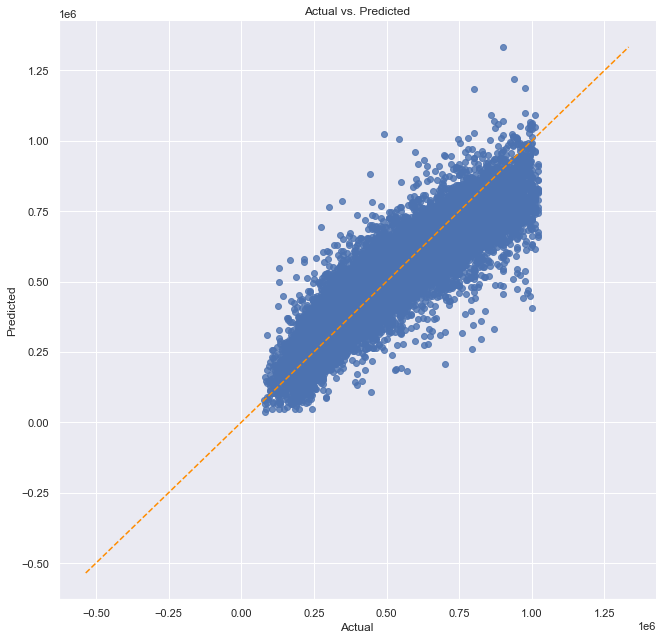

In [99]:
linear_assumption(lr, X, y)

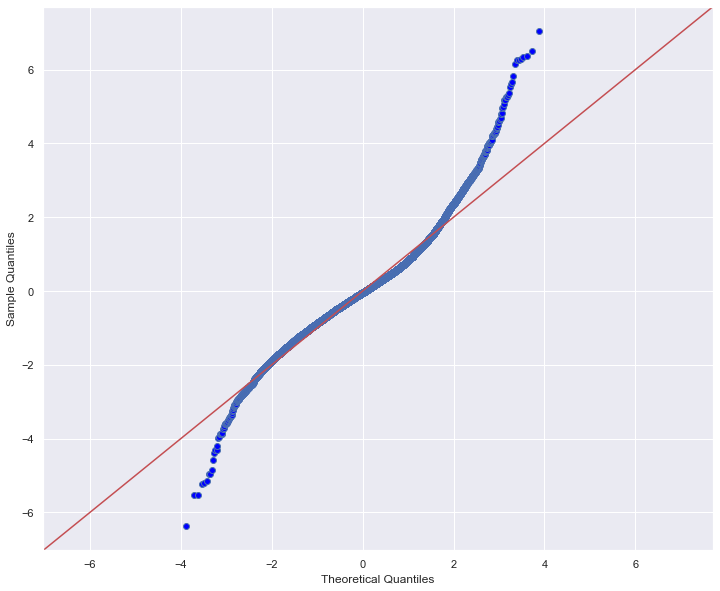

In [100]:
normality(lr, X, y)

* The Model seems to predict the middle 50% very well but trails of in the end quartiles.  This could be because of multicolinearity that is still occuring that we were unable to reduce or it is possible that categories of view and waterfront played a bigger part in pricing, but we weren't able to test those features due to time constraints.

In [101]:
vif_new(X,y).sort_values('VIF', ascending=False)

,feature,VIF
0,Intercept,10970.44
3,X[2],4.45
6,X[5],2.94
8,X[7],2.87
2,X[1],2.84
...,...,...
52,X[51],1.07
46,X[45],1.07
17,X[16],1.07
65,X[64],1.04


## 4 Interpreting the Data for the best fit model